# Diabetes, Pre-diabetes and Precursors

With this dataset, I will be exploring the story telling method through data. The objective is to show some ideas and predictions on how to help predict diabetes through other health data. I will import some basic libraries and functions to 
help visualize the data and maybe some modeling as well. My hope is that these will bring insights into this very 
widespread issue in our modern day society.

## About Dataset

#### Context

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annually.

#### Content

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

#### This dataset contains 3 files:

1. diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables.


2. diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.


3. diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df = pd.DataFrame(data=data)

### Exploring the Data

In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


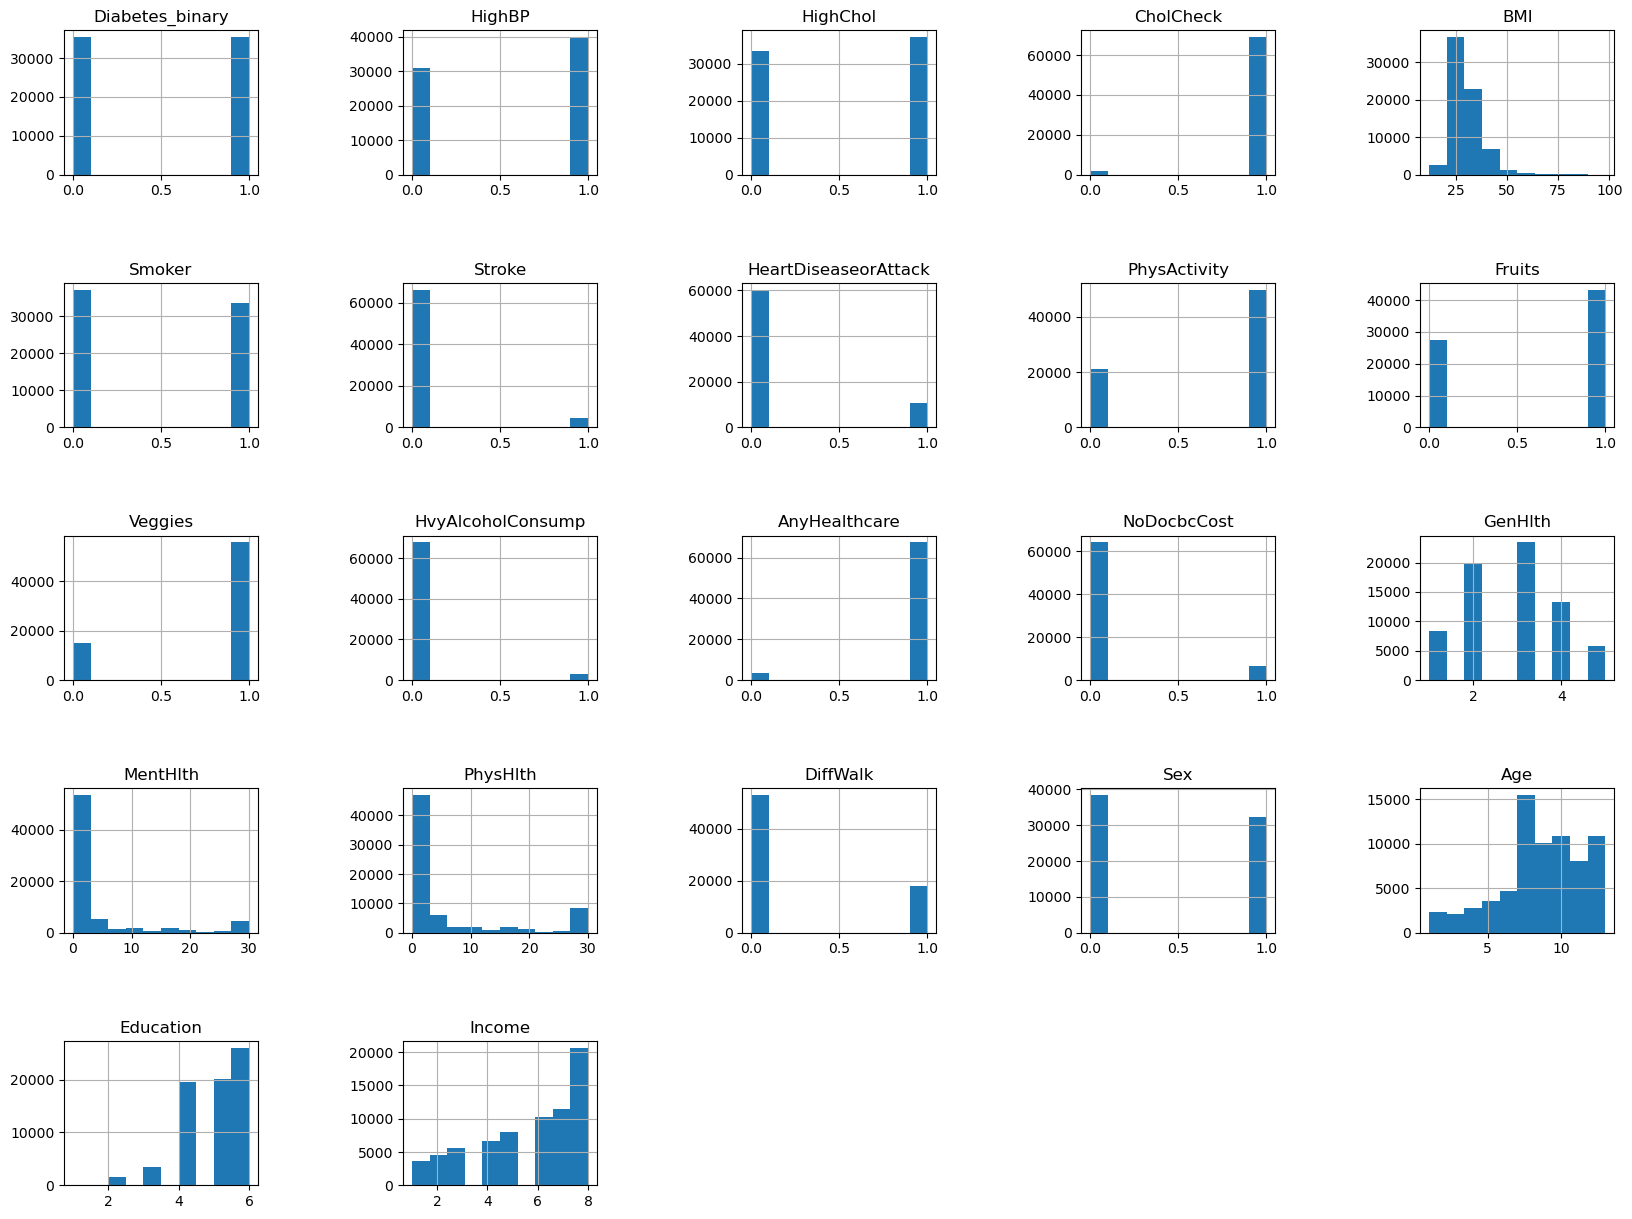

In [4]:
df.hist(figsize=(20,15))
plt.subplots_adjust(hspace=0.75, wspace=0.75);

In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
pos_df = df[df['Diabetes_binary'] == 1]
neg_df = df[df['Diabetes_binary'] == 0]

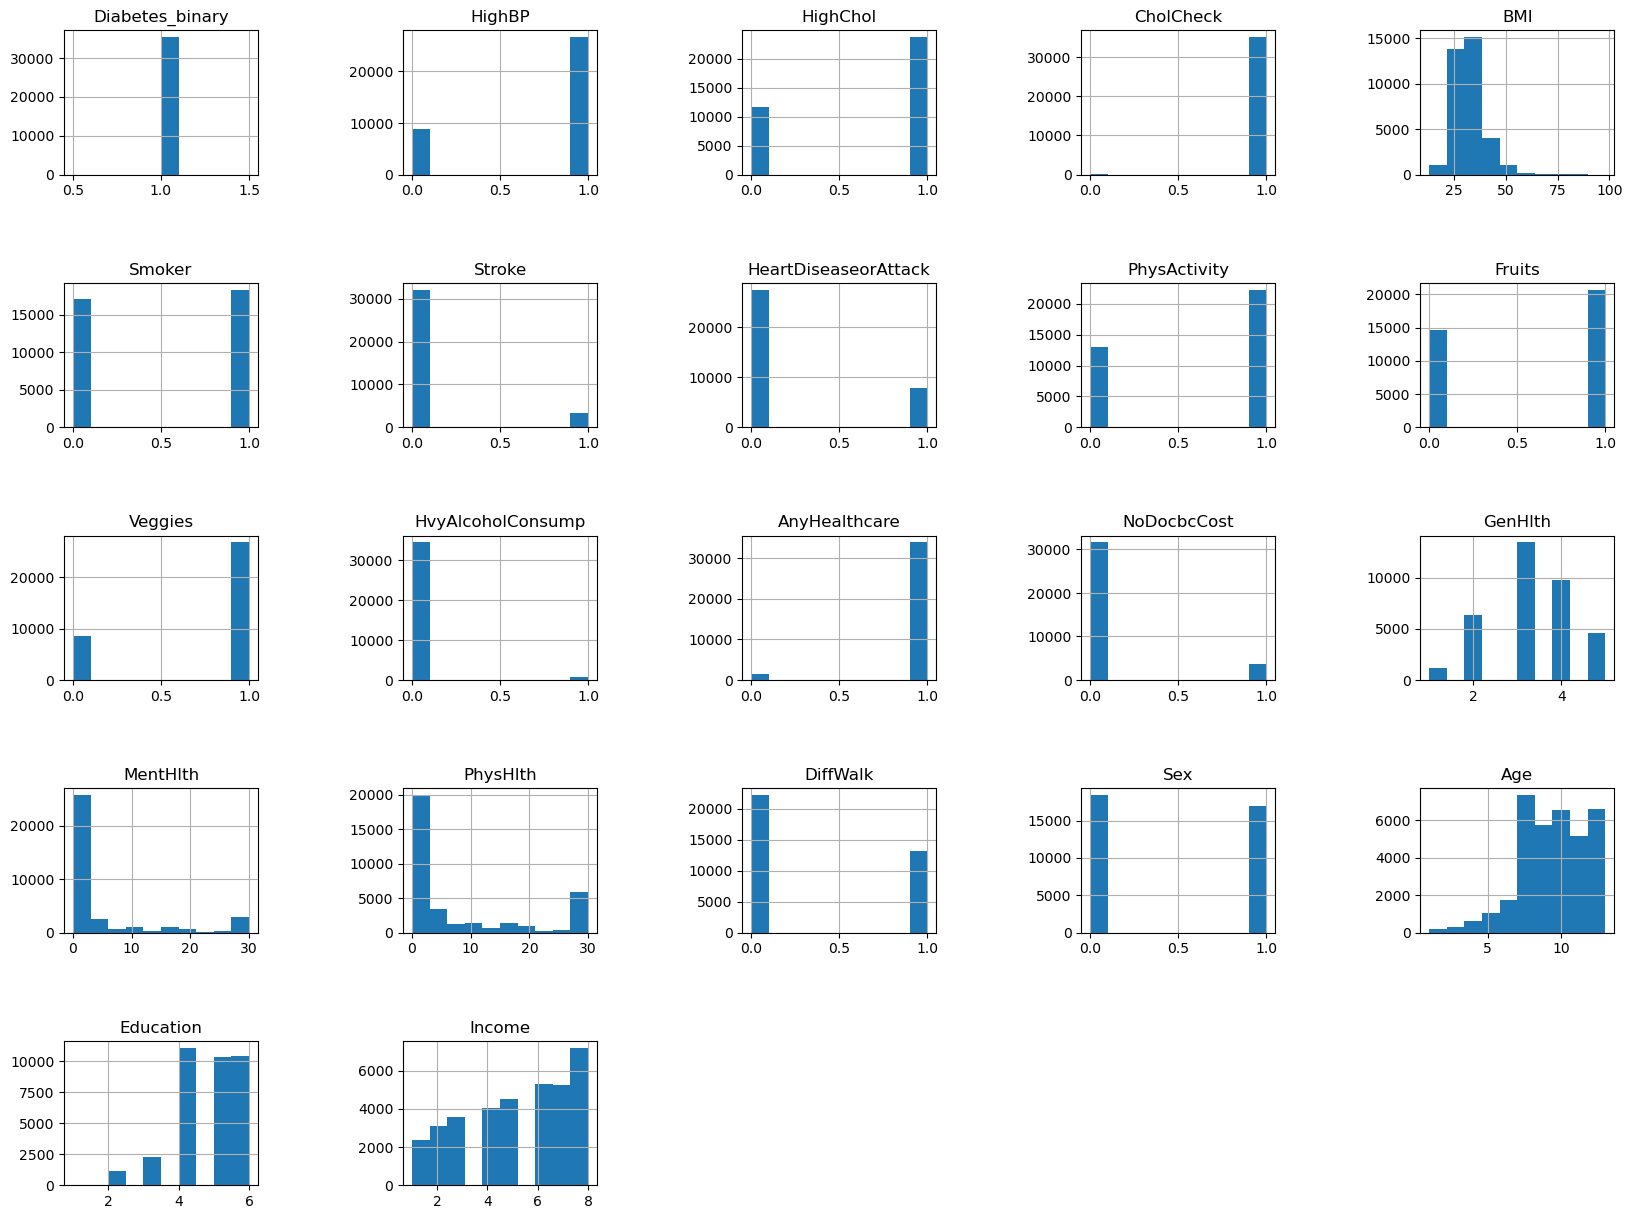

In [7]:
pos_df.hist(figsize=(20,15))
plt.subplots_adjust(hspace=0.75, wspace=0.75);

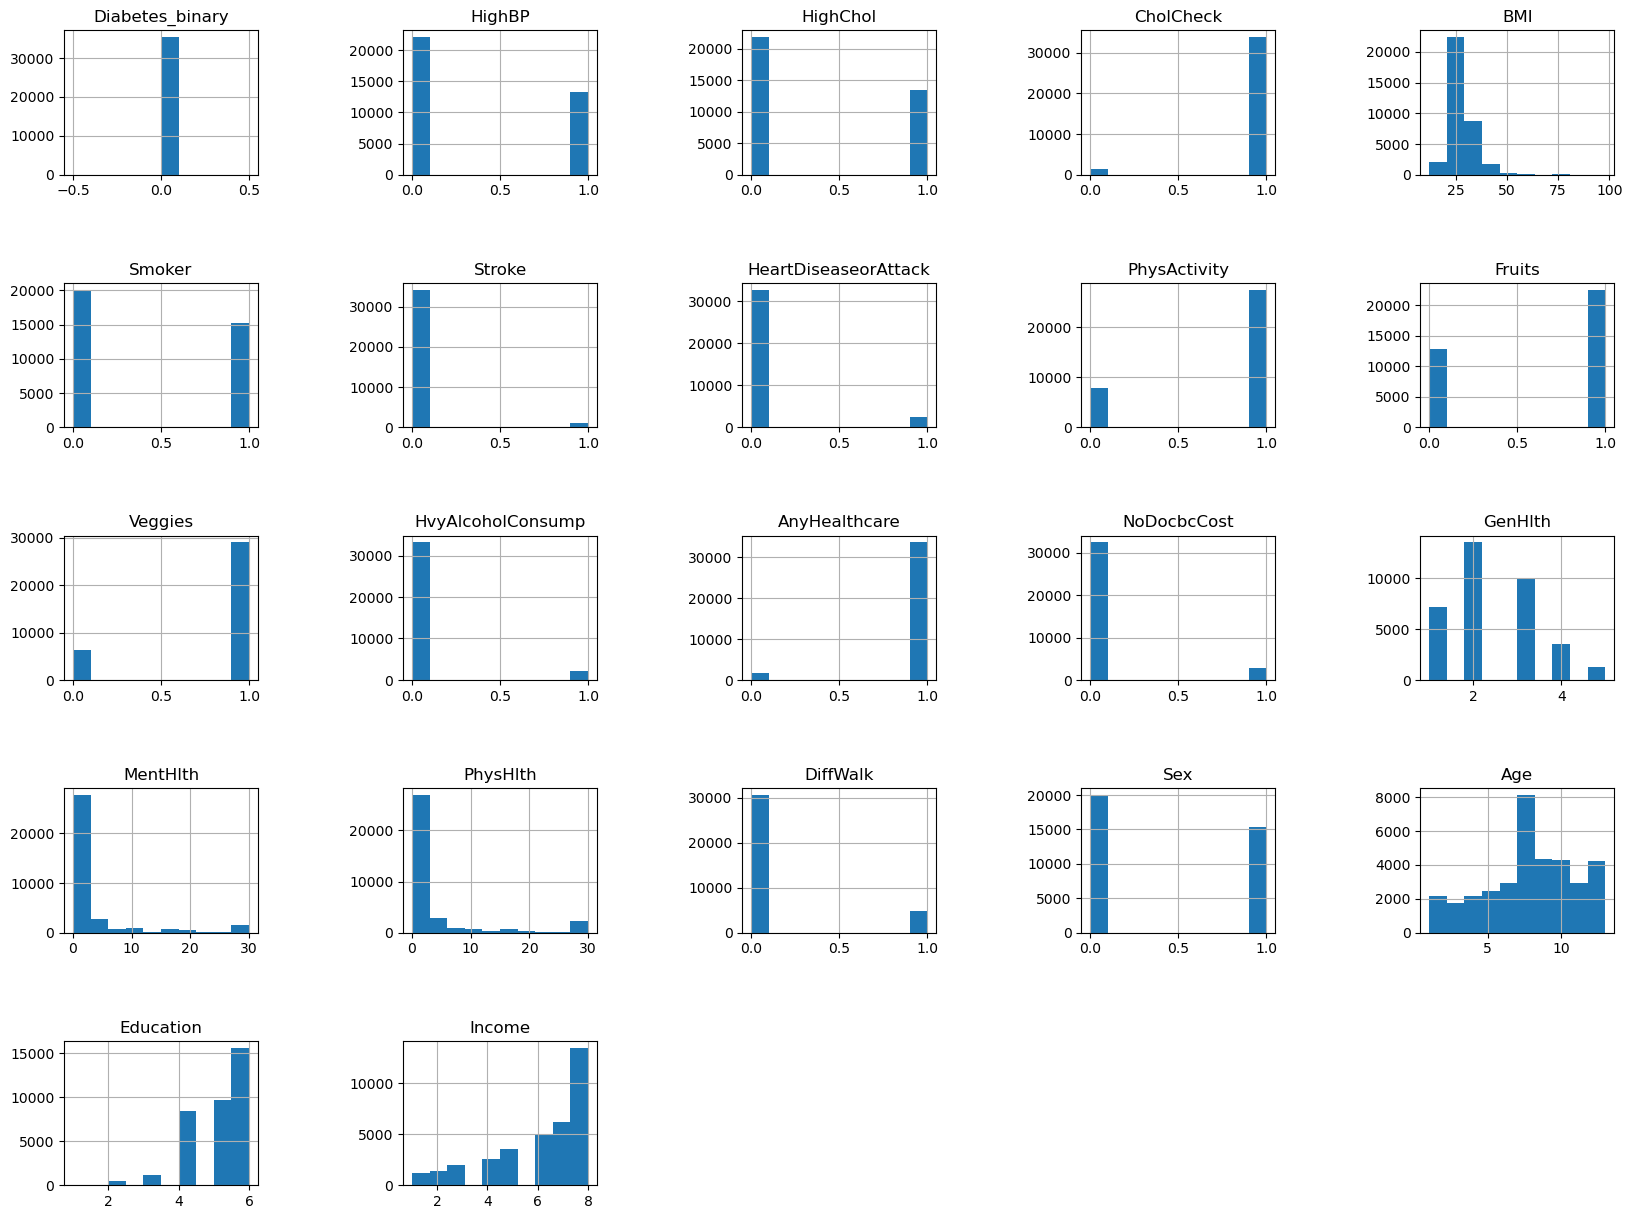

In [8]:
neg_df.hist(figsize=(20,15))
plt.subplots_adjust(hspace=0.75, wspace=0.75);

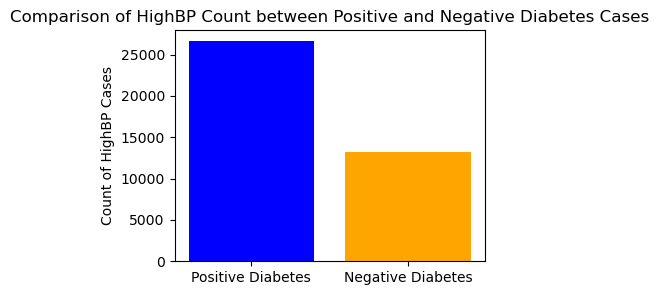

In [9]:
# Counting data points
count_pos_BP_df = len(pos_df[pos_df['HighBP'] == 1])
count_neg_BP_df = len(neg_df[neg_df['HighBP'] == 1])

# Data for plotting
BP_counts = [count_pos_BP_df, count_neg_BP_df]
df_BP_names = ['Positive Diabetes', 'Negative Diabetes']

# Plotting
plt.figure(figsize=(4, 3))
plt.bar(df_BP_names, BP_counts, color=['blue', 'orange'])

# Adding some plot details
plt.title('Comparison of HighBP Count between Positive and Negative Diabetes Cases')
plt.ylabel('Count of HighBP Cases')
plt.xticks(df_BP_names)

# Show plot
plt.show()

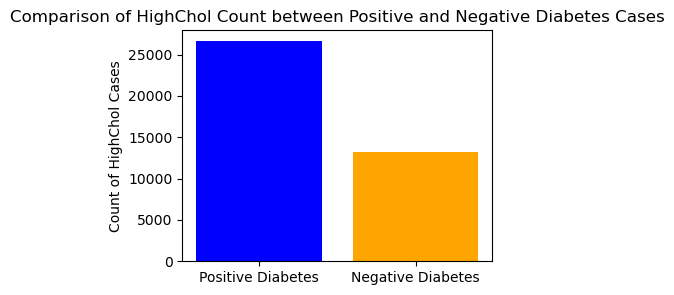

In [10]:
# Counting data points
count_pos_Chol_df = len(pos_df[pos_df['HighChol'] == 1])
count_neg_Chol_df = len(neg_df[neg_df['HighChol'] == 1])

# Data for plotting
Chol_counts = [count_pos_BP_df, count_neg_BP_df]
df_Chol_names = ['Positive Diabetes', 'Negative Diabetes']

# Plotting
plt.figure(figsize=(4, 3))
plt.bar(df_Chol_names, Chol_counts, color=['blue', 'orange'])

# Adding some plot details
plt.title('Comparison of HighChol Count between Positive and Negative Diabetes Cases')
plt.ylabel('Count of HighChol Cases')
plt.xticks(df_BP_names)

# Show plot
plt.show()

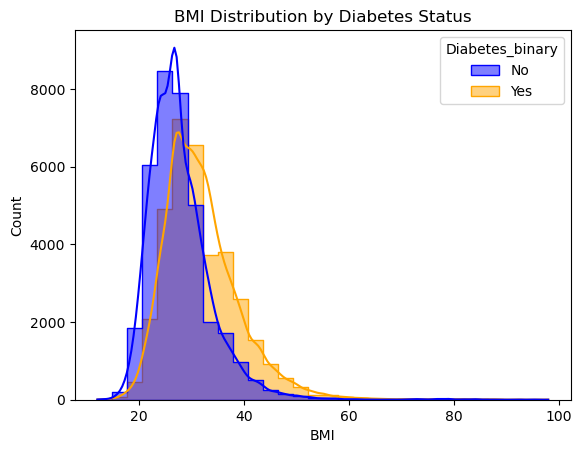

In [11]:
BMI_df = df.copy()
BMI_df['Diabetes_binary'].replace({0: 'No', 1: 'Yes'}, inplace=True)

# Creating the histogram
sns.histplot(data=BMI_df, x='BMI', hue='Diabetes_binary', element='step', palette=['blue', 'orange'], bins=30, alpha=0.5, kde=True)

# Adding plot details
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Count')

# Display the plot
plt.show()

Which is probably not a surprise to anyone, it seems that having a higher blood pressure, cholesterol and body mass index increases likelyhood of diabetes. I would be interested to see if some of the other factors can give a better idea of positive cases vs. negative.

In [13]:
# convert education and income to string before running get dummies
df['Education'] = df['Education'].astype(str)
df['Income'] = df['Income'].astype(str)

In [14]:
# defining feature list
feature_list = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
                'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']

In [15]:
# Converting features with one-hot encoding
features = df[feature_list]
features = pd.get_dummies(features, dtype=int)
print(features.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  26.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  26.0     1.0     1.0                   0.0   
2     0.0       0.0        1.0  26.0     0.0     0.0                   0.0   
3     1.0       1.0        1.0  28.0     1.0     0.0                   0.0   
4     0.0       0.0        1.0  29.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  Education_5.0  Education_6.0  \
0           1.0     0.0      1.0  ...              0              1   
1           0.0     1.0      0.0  ...              0              1   
2           1.0     1.0      1.0  ...              0              1   
3           1.0     1.0      1.0  ...              0              1   
4           1.0     1.0      1.0  ...              1              0   

   Income_1.0  Income_2.0  Income_3.0  Income_4.0  Income_5.0  Income_6.0  \
0           0           0  

In [16]:
# Checking for missing values in the features
if df[feature_list].isnull().any().any():
    print("Missing values found")

In [17]:
# Features and labels for dataset
X = features.values
y = df['Diabetes_binary'].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)


print("Dataset Shape:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Dataset Shape: (49484, 29) (21208, 29) (49484,) (21208,)


In [18]:
model = RandomForestClassifier(criterion='entropy', max_depth=25, max_features=30, min_samples_leaf=25, 
                                    min_samples_split=25, n_estimators=1000, n_jobs=-1, random_state=42, warm_start=True, 
                                    min_weight_fraction_leaf=0.0)

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features=30,
                       min_samples_leaf=25, min_samples_split=25,
                       n_estimators=1000, n_jobs=-1, random_state=42,
                       warm_start=True)

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the models
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for RandomForest Model: {accuracy}")

Accuracy for RandomForest Model: 0.7362787627310449


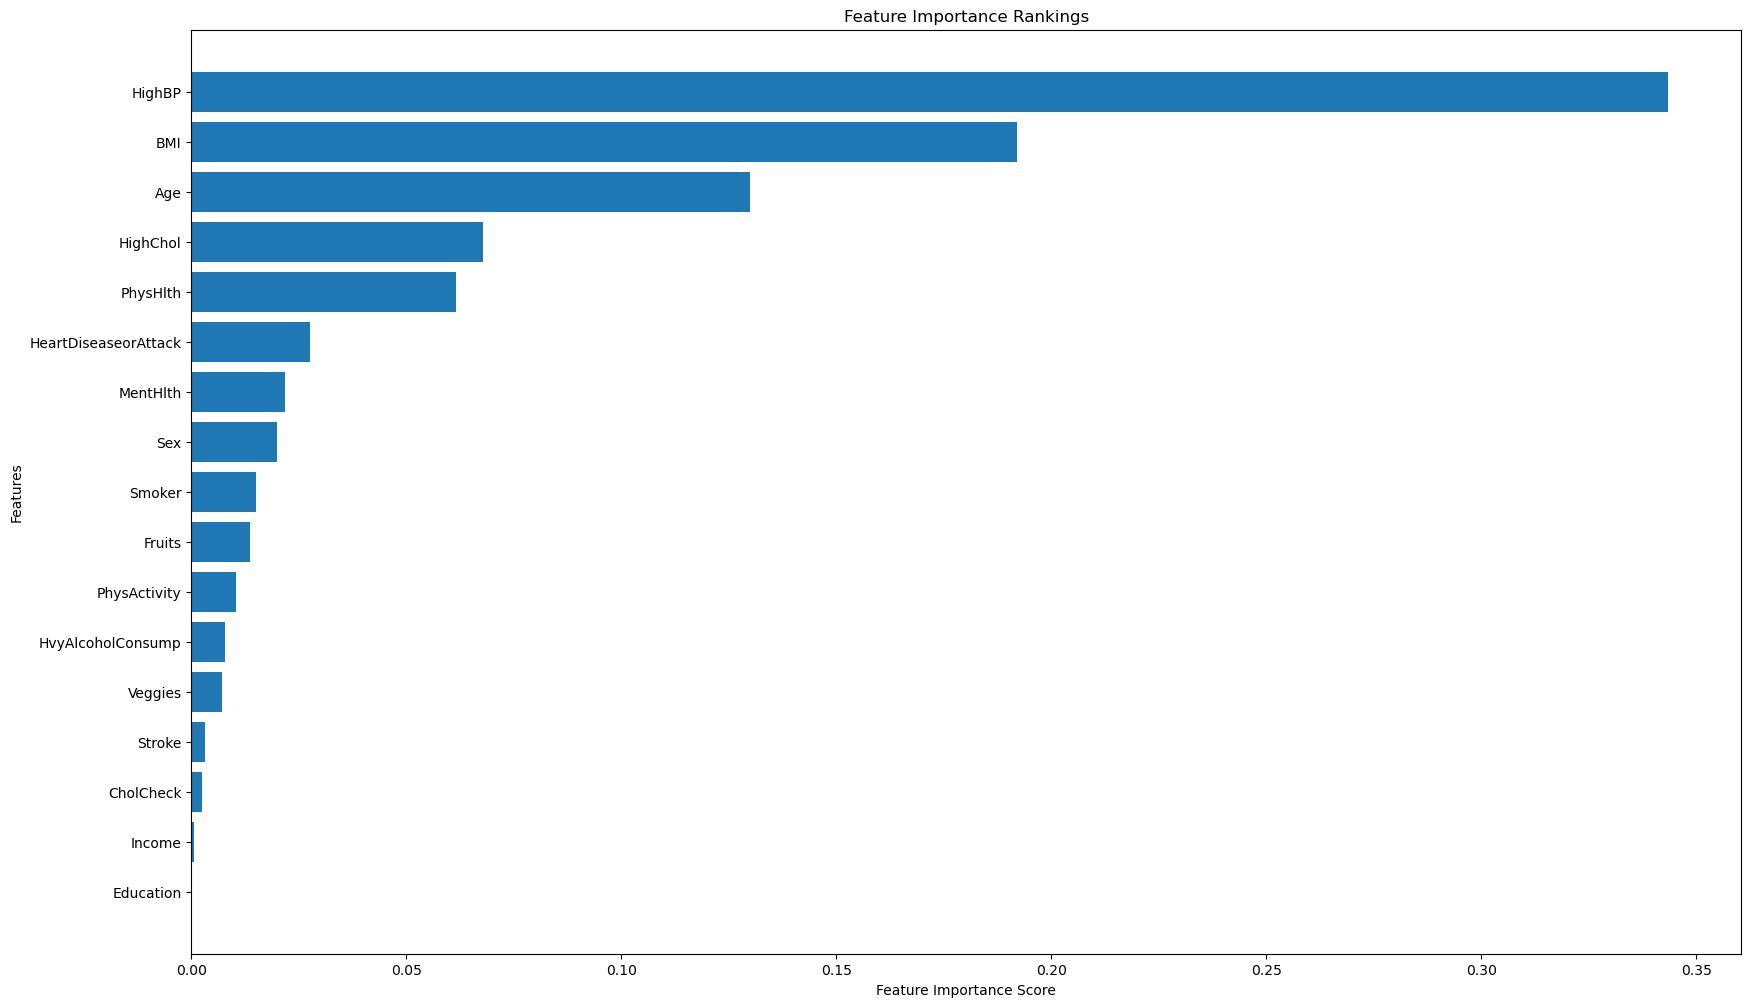

In [20]:
# Random Forest models feature importance
feature_importances = model.feature_importances_

# list to match the features used in current model
feature_names = feature_list

# Creating dictionaries to map feature names to their importances for each model
importances = dict(zip(feature_names, feature_importances))

# Function to plot feature importances and return top 30 features
def plot_feature_importances_and_get_top_30(importances, title):
    # Sort features by importance
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

    # Extract feature names and scores
    sorted_features = [x[0] for x in sorted_importances]
    sorted_scores = [x[1] for x in sorted_importances]

    # Plot
    plt.figure(figsize=(20, 12))
    plt.barh(sorted_features[:30], sorted_scores[:30])  # Plot only top 20 features
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

    # Return top 30 features
    return sorted_features[:30]

# Get and plot top 30 features for male model
top_30_features = plot_feature_importances_and_get_top_30(importances, 'Feature Importance Rankings')

The top 3 aren't a real surprise but I was not expecting 5. Could it be true if you are in good physical health you're at higher risk of diabetes. Maybe people with diabetes are over compensating with exercise in an attempt to fight it? I thought high cholesterol would have a larger impact but this model is far from perfect. One important thing to note is that this data is based on a survey and each individual's own scale is skewwed by their own perspective. I would like to see how a similar model would perform on an study with unbiased measurements and ratings.